In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np


In [3]:
def func(T, A, n, Ea):
    return np.log(A) + n*np.log(T)+ (-Ea/(1.987*T))

def calc_rc(T,A,n,Ea):
    k = []
    for temp in T:
        k.append(A *(temp**n)* np.exp(-Ea/ (1.987* temp)))
    return k

[ 6.72825137e+12  2.93693930e-01 -1.25089958e+02]


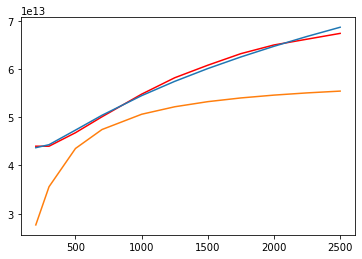

In [61]:
#branching reactions fitting
#h+ho2=oh+oh
Temp = [200,
300,
500,
700,
1000,
1250,
1500,
1750,
2000,
2250,
2500]
k = [4.40E+13,
4.40E+13,
4.68E+13,
5.01E+13,
5.48E+13,
5.82E+13, 
6.08E+13,
6.32E+13,
6.50E+13,
6.62E+13,
6.74E+13]
popt, pcov = curve_fit(func, Temp, np.log(k))
print(popt)
plt.plot(Temp,k, 'r-')
k_fit = calc_rc(Temp,popt[0],popt[1],popt[2])
plt.plot(Temp,k_fit)





cantera_coefficents = [5.888000e+13, 0.0, 300.0]
cantera_k = calc_rc(Temp,cantera_coefficents[0],cantera_coefficents[1],cantera_coefficents[2])
plt.plot(Temp,cantera_k)

[ 1.67970590e+10  8.63402208e-01 -5.15079286e+02]


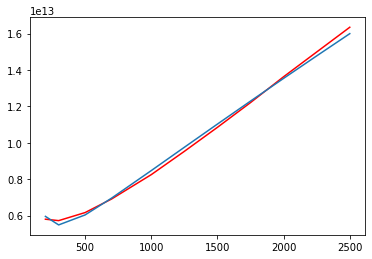

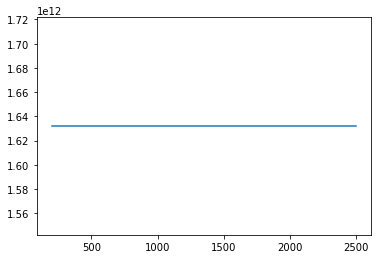

In [65]:
#branching reactions fitting
#h+ho2=h2o+o
Temp = [200,
300,
500,
700,
1000,
1250,
1500,
1750,
2000,
2250,
2500]
k_1d=np.array([6.50E+11,
6.62E+11,
7.95E+11,
1.02E+12,
1.45E+12,
1.88E+12,
2.36E+12,
2.88E+12,
3.43E+12,
3.99E+12,
4.55E+12])
k3d=np.array([5.15E+12,
5.06E+12,
5.37E+12,
5.89E+12,
6.80E+12,
7.65E+12,
8.49E+12,
9.33E+12,
1.02E+13,
1.10E+13,
1.18E+13])
k = k_1d + k3d

popt, pcov = curve_fit(func, Temp, np.log(k))
print(popt)
plt.plot(Temp,k, 'r-')
k_fit = calc_rc(Temp,popt[0],popt[1],popt[2])
plt.plot(Temp,k_fit)

plt.figure()
cantera_coefficents = [1.632000e+12, 0.0, 0.0]
cantera_k = calc_rc(Temp,cantera_coefficents[0],cantera_coefficents[1],cantera_coefficents[2])
plt.plot(Temp,cantera_k)

In [63]:
#Find ttl rc with OH branching ratio 
Temp = np.array([200,
300,
500,
700,
1000,
1250,
1500,
1750,
2000,
2250,
2500])
k_oh_oh = np.array([4.40E+13,
4.40E+13,
4.68E+13,
5.01E+13,
5.48E+13,
5.82E+13,
6.08E+13,
6.32E+13,
6.50E+13,
6.62E+13,
6.74E+13])

branching_ratio_oh_oh=np.array([0.856261596,
0.847715249,
0.825174254,
0.796867871,
0.751479566,
0.708356937,
0.663213169,
0.618537157,
0.578556856,
0.536750498,
0.501338172])

k_ttl = np.true_divide(k_oh_oh,branching_ratio_oh_oh)

In [48]:
k_ttl

array([5.13861654e+13, 5.19042214e+13, 5.67152935e+13, 6.28711507e+13,
       7.29228079e+13, 8.21619680e+13, 9.16748986e+13, 1.02176562e+14,
       1.12348509e+14, 1.23334771e+14, 1.34440192e+14])

In [52]:
#find h2 + o2 with k ttl
k_ttl = np.array([5.13861654e+13, 5.19042214e+13, 5.67152935e+13, 6.28711507e+13,
       7.29228079e+13, 8.21619680e+13, 9.16748986e+13, 1.02176562e+14,
       1.12348509e+14, 1.23334771e+14, 1.34440192e+14])
k_h2_o2_branching_ratio = np.array([0.031499025,
0.042371685,
0.066183113,
0.09291151,
0.138110744,
0.178203293,
0.21950973,
0.259522661,
0.300428335,
0.338820977,
0.3759235])
k_h2_o2 = k_h2_o2_branching_ratio*k_ttl


array([1.61861411e+12, 2.19926932e+12, 3.75359468e+12, 5.84145355e+12,
       1.00714233e+13, 1.46415333e+13, 2.01235322e+13, 2.65171333e+13,
       3.37526755e+13, 4.17884076e+13, 5.05392275e+13])

[ 1.13542846e+07  1.93886071e+00 -6.42325352e+02]


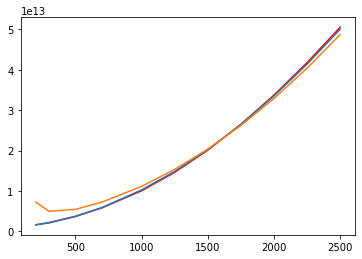

In [60]:
#fiting_k_h2_o2

Temp = np.array([200,
300,
500,
700,
1000,
1250,
1500,
1750,
2000,
2250,
2500])
k=np.array([1.61861411e+12, 2.19926932e+12, 3.75359468e+12, 5.84145355e+12,
       1.00714233e+13, 1.46415333e+13, 2.01235322e+13, 2.65171333e+13,
       3.37526755e+13, 4.17884076e+13, 5.05392275e+13])

popt, pcov = curve_fit(func, Temp, np.log(k))
print(popt)
plt.plot(Temp,k, 'r-')
k_fit = calc_rc(Temp,popt[0],popt[1],popt[2])
plt.plot(Temp,k_fit)


cantera_coefficents = [2.945000e+06, 2.087, -1455.0]
cantera_k = calc_rc(Temp,cantera_coefficents[0],cantera_coefficents[1],cantera_coefficents[2])
plt.plot(Temp,cantera_k)

In [4]:
Temp_range = np.arange(200,3000)
F_cent_original = []
for Temp in Temp_range:
    F_cent_original.append(2e-5 * Temp + 0.144)

F_cent_original = np.array(F_cent_original)

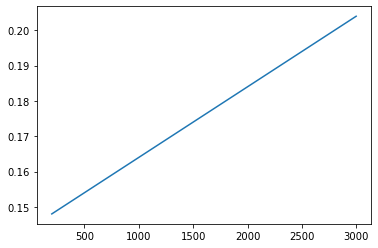

In [5]:
plt.plot(Temp_range,F_cent_original)

In [7]:
def func_2(T, A, T3, T1):
    return np.log(1- A) * (-T/T3) + np.log(A) * (-T/T1)
def func_3(T, A, T3, T1):
    return (1- A) * np.exp(-T/T3) + A* np.exp(-T/T1)

def calc_f_cent(T, A, T3, T1):
    f_cent_calc = []
    for temp in T:
        f_cent_calc.append((1-A)*np.exp(-temp/T3) + A*np.exp(-temp/T1))
    return f_cent_calc

In [12]:
popt, pcov = curve_fit(func_2, Temp_range, np.log(F_cent_original))
print(popt)
#plt.plot(Temp_range,F_cent_original, 'r-')
#f_cent_fit = calc_f_cent(Temp_range,popt[0],popt[1],popt[2])
#plt.plot(Temp_range,f_cent_fit)
popt, pcov = curve_fit(func_2, Temp_range, F_cent_original)
print(popt)

[1. 1. 1.]
[1. 1. 1.]


/Users/carlylagrotta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/carlylagrotta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/Users/carlylagrotta/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


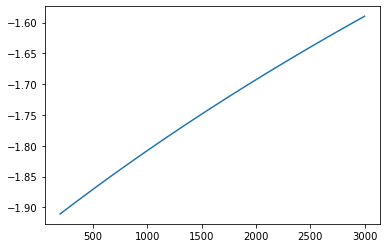

In [11]:
plt.plot(Temp_range, np.log(F_cent_original))

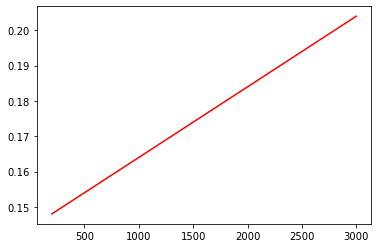

In [14]:

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np


Temp_range = np.arange(200,3000)
F_cent_original = []
for Temp in Temp_range:
    F_cent_original.append(2e-5 * Temp + 0.144)

F_cent_original = np.array(F_cent_original)




def func_2(T, A, T3, T1):
    return np.log(1- A) * (-T/T3) + np.log(A) * (-T/T1)
def func_3(T, A, T3, T1,T2):
    return np.multiply(1-A,np.exp(-T/T3)) + np.multiply(A,np.exp(-T/T1))+np.exp(-T2/T)

popt, pcov = curve_fit(func_3, Temp_range, np.log(F_cent_original))
plt.plot(Temp_range,F_cent_original, 'r-')



In [ ]:
#plt.plot(Temp_range,F_cent_original, 'r-')
#f_cent_fit = calc_f_cent(Temp_range,popt[0],popt[1],popt[2])
#plt.plot(Temp_range,f_cent_fit)
popt, pcov = curve_fit(func_2, Temp_range, F_cent_original)
print(popt)

In [11]:
import cantera as ct
gas = ct.Solution('FFCM1_custom_cheb_extra_zeros_new_extra_reactions_precursor.cti')
reactions = gas.reaction_equations()
print(reactions.index('CO + OH <=> CO2 + H'))
reactions[32]

31


'CO + OH <=> CO2 + H'

In [15]:
temp = np.linspace(200,2000)
k1= []
k2=[]
for Temp in temp:
    gas.TPX = Temp, 101325, {'Ar':1}
    k1.append(gas.forward_rate_constants[31]*1000)
    k2.append(gas.forward_rate_constants[31]*1000)

In [16]:
k_ttl = np.array(k1) + np.array(k2)
popt, pcov = curve_fit(func, temp, np.log(k_ttl))

k_fit = calc_rc(temp,popt[0],popt[1],popt[2])


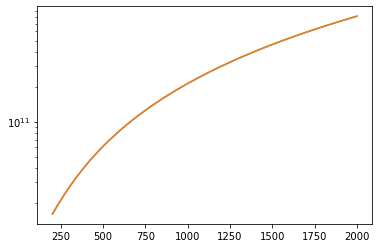

In [17]:
import matplotlib.pyplot as plt
plt.semilogy(temp,k_ttl)
plt.plot(temp,k_fit)

In [18]:
popt[0],popt[1],popt[2]

(123740.00000000131, 2.0529999999999986, -355.96343003355344)

In [23]:
gas = ct.Solution('FFCM1_custom_cheb_extra_zeros_new_extra_reactions_precursor.cti')
temp = np.linspace(200,2000)
k= []
for Temp in temp:
    gas.TPX = Temp, 101325, {'Ar':1}
    k.append(gas.forward_rate_constants[31]*1000)
print(gas.reaction_equations()[31])

CO + OH <=> CO2 + H


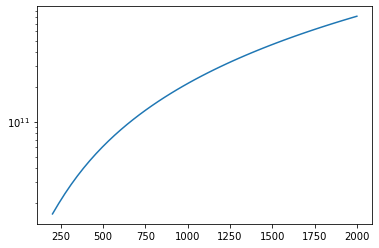

In [24]:
plt.semilogy(temp,k)